# Predicting House Price using Machine Learning 
This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting a house price based on their attributes.

We're going to take the following approach:

    Problem definition
    Data
    Evaluation
    Features
    Modeling
    Experimentation
    
## 1. Problem Definition

In a statement, -> Given clinical parameters about a patient, can we predict whether or not they have a heart disease?

## 2. Data

The original data came from the kaggle Bengaluru House Price data


link: https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data

## 3. Evaluation

## 4. Features

Information about the columns/features.

#### Create data dictionary

    Area type
    Avaliblity
    Location 
    Size
    Society
    Balcony
    Total sqft
    Bath





## Preparing the tools
We're going to use `matplotlib` `pandas` `numpy` for data manipulation and analysis.



In [1]:
# Import all the tools we need


# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [31]:
dic = {'name': ['oitik', 'ridoy', 'golam'],
       'roll': [71, 35, 113]}
dic

{'name': ['oitik', 'ridoy', 'golam'], 'roll': [71, 35, 113]}

In [32]:
df = pd.DataFrame(dic)

In [33]:
df

,name,roll
0,oitik,71
1,ridoy,35
2,golam,113


## Import the dataframe

In [2]:
df = pd.read_csv('data/Bengaluru_House_Data.csv')

In [4]:
df.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00


In [36]:
df.shape

(13320, 9)

In [5]:
df.groupby('area_type')['area_type'].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df.drop(['area_type', 'society', 'availability'], axis=1, inplace=True)

In [7]:
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [40]:
df.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [41]:
median = df['balcony'].median()

In [8]:
df['balcony'].fillna(df['balcony'].median(), inplace=True)

In [9]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [10]:
df['bath'].fillna(df['bath'].median(), inplace=True)

In [11]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
balcony        0
price          0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [14]:
df.shape

(13303, 6)

In [15]:
df.head(2)

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00


In [49]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [16]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [17]:
df.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [18]:
87*3

261

In [52]:
df[df.bhk>10]

,location,size,total_sqft,bath,balcony,price,bhk
459,1 Giri Nagar,11 BHK,5000,9.0,3.0,360.0,11
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
1768,1 Ramamurthy Nagar,11 Bedroom,1200,11.0,0.0,170.0,11
3379,1Hanuman Nagar,19 BHK,2000,16.0,2.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,2.0,550.0,16
3853,1 Annasandrapalya,11 Bedroom,1200,6.0,3.0,150.0,11
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43
4916,1Channasandra,14 BHK,1250,15.0,0.0,125.0,14
6533,Mysore Road,12 Bedroom,2232,6.0,2.0,300.0,12
7979,1 Immadihalli,11 BHK,6000,12.0,2.0,150.0,11


In [19]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
def is_float(x):
    '''
    Determines a value is float or not by returning True or False.
    '''
    try:
        float(x)
    except:
        return False
    return True

In [22]:
df[~df['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,2.0,2.0,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2


In [23]:
def convert(x):
    '''
    Converts Range sqft values to their average...
    '''
    vals = x.split('-')
    if len(vals) == 2:
        return (float(vals[0])+float(vals[1]))/2
    try:
        return float(x)
    except:
        return None

In [57]:
convert(df['total_sqft'][30]), (2100+2850)/2

(2475.0, 2475.0)

In [24]:
df1 = df.copy()

In [25]:
df1['total_sqft'] = df1['total_sqft'].apply(convert)

In [27]:
df['total_sqft'] = df['total_sqft'].apply(convert)

In [28]:
df.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
balcony             0.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [29]:
df.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [30]:
df2 = df.copy()

In [31]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']

In [32]:
df.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [66]:
# Create a function to save data
def save(dtfr, name):
    '''
    Saves a pandas dataframe in the data folder
    '''
    dtfr.to_csv('data/' + name + '.csv')

In [33]:
df.to_csv('data/house_data.csv')

In [37]:
save(df)

In [65]:
len(df.location.unique())

1304

In [38]:
# Remove front and end spaces from the location values
df.location = df.location.apply(lambda x: x.strip())

In [39]:
df['location']

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13303, dtype: object

In [40]:
location_stats = df.groupby('location')['location'].count().sort_values(ascending=False)

In [41]:
location_stats

location
Whitefield               540
Sarjapur  Road           397
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [42]:
len(location_stats[location_stats<=10])

1052

In [43]:
location_stats_less = location_stats[location_stats<=10]

In [44]:
location_stats_less

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [73]:
df.head(3)

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3


In [45]:
df.location = df.location.apply(lambda x: 'other' if x in location_stats_less else x)


In [46]:
df.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [47]:
len(df.location.unique())

242

In [51]:
df.groupby('location')['location'].count().sort_values(ascending=False)

location
other               2882
Whitefield           540
Sarjapur  Road       397
Electronic City      304
Kanakpura Road       273
                    ... 
LB Shastri Nagar      11
Marsur                11
Narayanapura          11
Nehru Nagar           11
HAL 2nd Stage         11
Name: location, Length: 242, dtype: int64

In [52]:
df.head(3)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556


In [53]:
df[df['total_sqft']/df['bhk']<300]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,2.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,2.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,2.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,2.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,1.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,3.0,70.0,5,9043.927649


In [55]:
# Remove these wrong values
df = df[~(df['total_sqft']/df['bhk']<300)]

In [56]:
df.shape

(12559, 8)

In [57]:
df1.shape

(13303, 7)

In [58]:
# 13303-12559 makes sense

744

In [59]:
df.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [63]:
df.head(3)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556


In [62]:
df.groupby('location').count().head(3)

,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
location,,,,,,,
1st Block Jayanagar,10,10,10,10,10,10,10
1st Phase JP Nagar,24,23,24,24,24,24,23
2nd Phase Judicial Layout,11,11,11,11,11,11,11


In [ ]:
## Function to remove outliers

In [70]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out
        

In [67]:
save(df, 'houseee')

In [71]:
df2 = remove_pps_outliers(df)
df2.shape

(10286, 8)

In [72]:
df.shape

(12559, 8)

In [73]:
df = df2

In [74]:
df.shape

(10286, 8)

In [75]:
12559-10286

2273

ValueError: not enough values to unpack (expected 2, got 0)

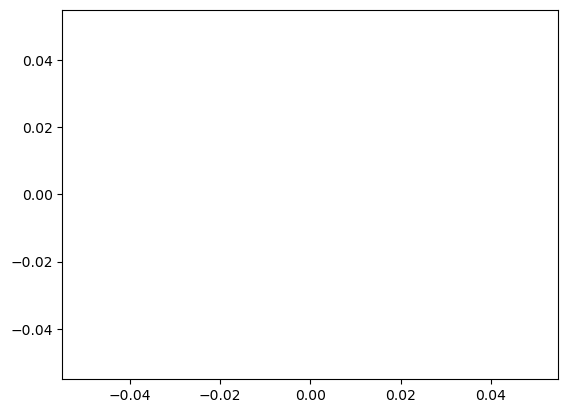

In [82]:
bhk2 = df[(df.location=='Rajaji Nagar')&(df.bhk==2)]
bhk3 = df[(df.location=='Rajaji Nagar')&(df.bhk==3)]
fig , ax = plt.plot(figsize=(10,10))


In [90]:
def plot_scatter_chart(df, location):
    '''
    Scatter 2 and 3 bedroom apartment price graph in the particular location.
    '''
    bhk2 = df[(df.location==location)&(df.bhk==2)]
    bhk3 = df[(df.location==location)&(df.bhk==3)]
    plt.subplots(figsize=(10,6))
    plt.scatter(bhk2.total_sqft, bhk2.price, color='green', label='bhk-2', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color='red', label='bhk-3')
    plt.xlabel('Total_square_feet_area')
    plt.ylabel('Price')
    plt.title('mmm '+location+' mmm', color='blue')
    plt.legend()
    


## From this graph we will understand the price difference in 2 and 3 bedroom apartments in a particular city

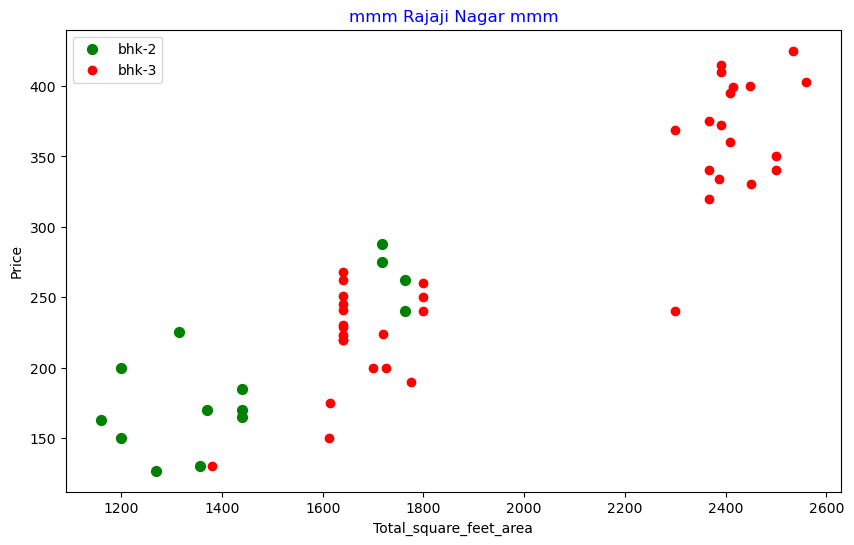

In [92]:
plot_scatter_chart(df, 'Rajaji Nagar')

In [114]:
def grp_by(df, attr):
    '''
    Returns the count of total values of the attribute
    '''
    return df.groupby(attr)[attr].count().sort_values(ascending=False)


In [94]:
df.groupby('location')['location'].count().sort_values(ascending=False)

location
other                   2302
Whitefield               484
Sarjapur  Road           301
Electronic City          279
Kanakpura Road           196
                        ... 
Vishveshwarya Layout       4
HAL 2nd Stage              4
Thyagaraja Nagar           4
Vishwapriya Layout         4
Marsur                     3
Name: location, Length: 242, dtype: int64

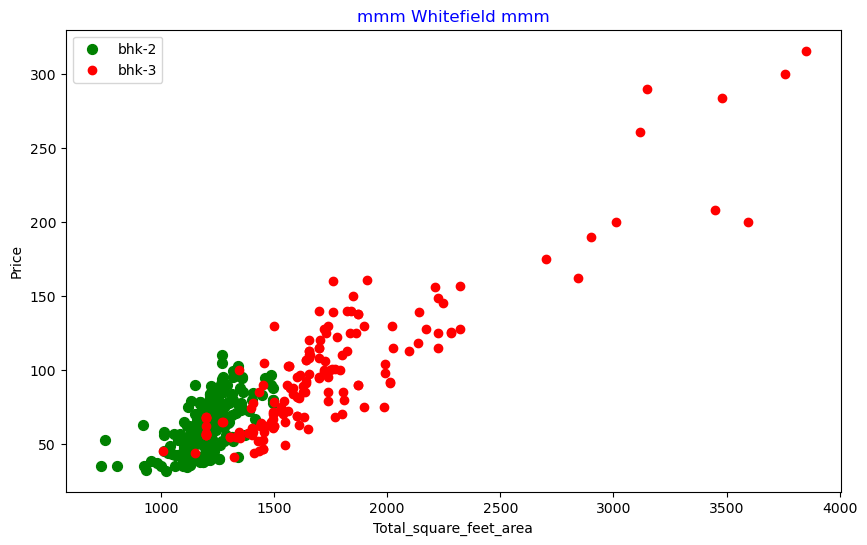

In [96]:
plot_scatter_chart(df, 'Whitefield')

In [99]:
df1.head(2)

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4


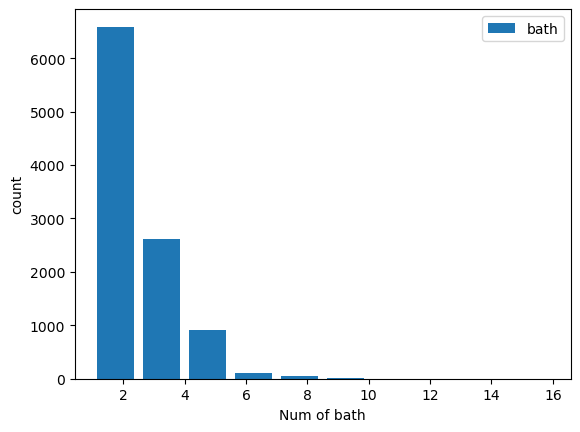

In [103]:
plt.hist(df.bath, rwidth=0.8)
plt.xlabel("Num of bath")
plt.ylabel('count')
plt.legend(['bath'])

In [115]:
grp_by(df, 'bath')

bath
2.0     5975
3.0     2619
4.0      676
1.0      615
5.0      235
6.0      107
7.0       27
8.0       17
9.0       10
12.0       3
13.0       1
16.0       1
Name: bath, dtype: int64

In [116]:
df[df.bath>df.bhk+2]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1634,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
5267,Nagasandra,4 Bedroom,7000.0,8.0,2.0,450.0,4,6428.571429
6748,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8455,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


## All of these are outliers

In [117]:
df.shape

(10286, 8)

In [118]:
df = df[df.bath<df.bhk+2]
df.shape

(10192, 8)

In [120]:
df.drop(['size', 'price_per_sqft'], axis=1)

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.00,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.00,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.00,3
3,1st Block Jayanagar,1200.0,2.0,0.0,130.00,3
4,1st Block Jayanagar,1235.0,2.0,2.0,148.00,2
...,...,...,...,...,...,...
10281,other,1353.0,2.0,2.0,110.00,2
10282,other,812.0,1.0,0.0,26.00,1
10283,other,1440.0,2.0,2.0,63.93,3
10284,other,1075.0,2.0,2.0,48.00,2


In [121]:
df.head(3)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333


## Turn non numeric values into numerical values

### Use `pandas` dummies 

In [123]:
dummies = pd.get_dummies(df.location)
dummies.head(2)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
df = pd.concat([df, dummies.drop('other', axis=1)], axis=1)

In [126]:
df.head(3)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333,1,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
df.drop(['size', 'price_per_sqft'], axis=1, inplace=True)

In [128]:
df.head(3)

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
df.drop('location', axis=1, inplace=True)

In [131]:
df.head(3)

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
df.shape

(10192, 246)

## Modeling

We're going to use three different machine learning models:

1. Linear Regression
2. Lasso
3. Decision tree regression

In [133]:
# Split the data

x = df.drop('price', axis=1)
x.head()

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
y = df['price']
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [136]:
conda install scikit-learn

Retrieving notices: ...working... done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.3.1



## Package Plan ##

  environment location: /Users/tanbeerjubaer/Desktop/ml/house-price-project/env

  added / updated specs:
    - scikit-learn


The following NEW packages will be INSTALLED:

  appdirs            pkgs/main/noarch::appdirs-1.4.4-pyhd3eb1b0_0 
  joblib             pkgs/main/osx-arm64::joblib-1.1.1-py311hca03da5_0 
  pooch              pkgs/main/noarch::pooch-1.4.0-pyhd3eb1b0_0 
  scikit-learn       pkgs/main/osx-arm64::scikit-learn-1.2.2-py311h313beb8_0 
  scipy              pkgs/main/osx-arm64::scipy-1.10.1-py311hc76d9b0_0 
  threadpoolctl      pkgs/main/noarch::threadpoolctl-2.2.0-pyh0d69192_0 




Preparing transaction:

In [138]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [140]:
x_train.head(2)

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
5159,1080.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8231,3600.0,4.0,2.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
x_test.head(2)

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
6694,1200.0,2.0,3.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3765,1035.0,2.0,1.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
y_train.head(2)

5159     45.0
8231    300.0
Name: price, dtype: float64

In [144]:
y_test.head(2)

6694    60.0
3765    40.5
Name: price, dtype: float64

In [146]:
save(df, 'house_price')

## Train and fit data to the model


In [147]:
from sklearn.linear_model import LinearRegression
# Create model
clf = LinearRegression()

# Fit the data to the model
clf.fit(x_train, y_train)

LinearRegression()

## Check the score of the data

Check score on the test dataset


In [148]:
clf.score(x_test, y_test)

0.7116172080510443

In [149]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

np.random.seed(42)
cv = ShuffleSplit(n_splits=5, test_size=0.2)
cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.71161721, 0.83149284, 0.79262457, 0.78404384, 0.77117753])

In [152]:
# Change max_sample value
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42,
                              max_samples=8000)

In [153]:
%%time
model.fit(x_train, y_train)

CPU times: user 4.95 s, sys: 34 ms, total: 4.98 s
Wall time: 4.98 s


RandomForestRegressor(max_samples=8000, random_state=42)

In [154]:
model.score(x_test, y_test)

0.6296190377950976

## Use grid SearchCV

In [167]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


def find_best_model(x, y):
    algos={
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'positive': [False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection':['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter':['best', 'random']
            }
        }
        
                           
    }
    scores = []
    np.random.seed(71)
    cv = ShuffleSplit(n_splits=5, test_size=0.2)
    for algo_name , config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
    

In [169]:
ans = find_best_model(x, y)

/Users/tanbeerjubaer/Desktop/ml/house-price-project/env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/tanbeerjubaer/Desktop/ml/house-price-project/env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tanbeerjubaer/Desktop/ml/house-price-project/env/lib/python3.11/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/Users/tanbeerjubaer/Desktop/ml/house-price-project/env/lib/pyt

In [170]:
ans

,model,best_score,best_params
0,linear_regression,0.798925,{'positive': False}
1,lasso,0.665968,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.653499,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [171]:
score_list = ans['best_score']

In [174]:
score_list = list(score_list)

In [175]:
score_list

[0.7989247102694577, 0.6659680174153568, 0.6534988596991977]

## Plot the result

In [178]:
score = ans.drop('best_params', axis=1)
score

,model,best_score
0,linear_regression,0.798925
1,lasso,0.665968
2,decision_tree,0.653499


In [184]:
score.plot(x='model', y='best_score', kind = bar)
plt.show()

NameError: name 'bar' is not defined